<a href="https://colab.research.google.com/github/charookc5/AIML_internship/blob/main/AIML_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Replace with your dataset path
df = pd.read_csv("heart.csv")

print(df.head())
print(df.info())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5 

In [3]:
X = df.drop("target", axis=1)  # Features
y = df["target"]               # Target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))


Decision Tree Accuracy: 0.7540983606557377


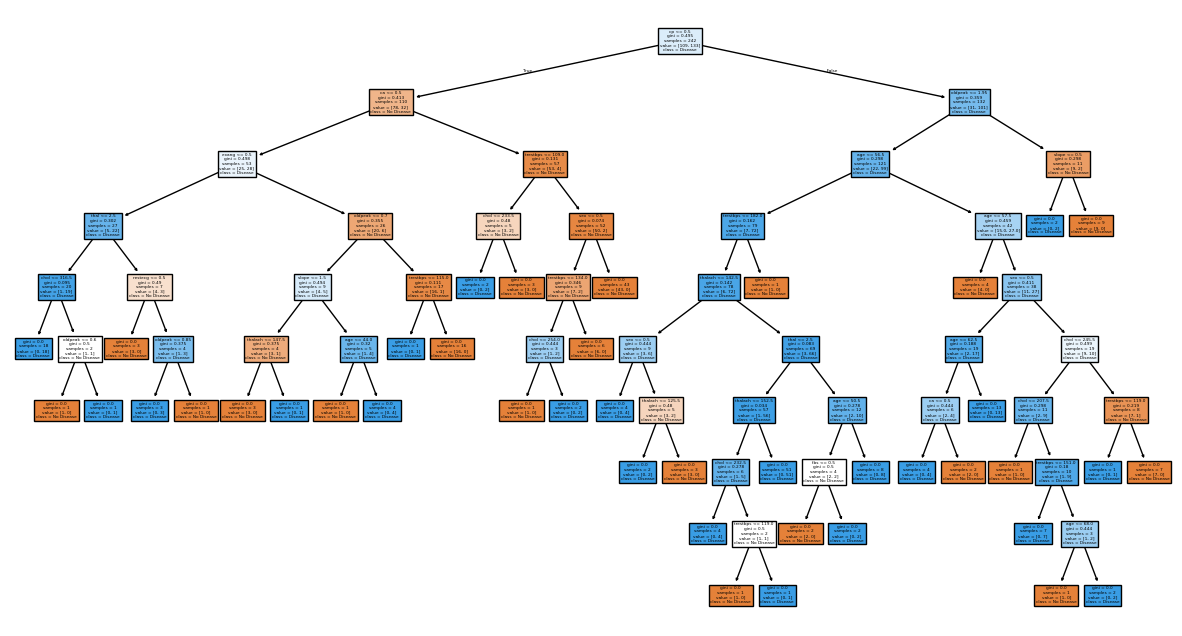

In [4]:
from sklearn import tree
plt.figure(figsize=(15,8))
tree.plot_tree(dt, feature_names=X.columns, class_names=["No Disease","Disease"], filled=True)
plt.show()


In [5]:
import graphviz
dot_data = export_graphviz(dt, out_file=None,
                           feature_names=X.columns,
                           class_names=["No Disease","Disease"],
                           filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph.render("decision_tree")  # saves as PDF


'decision_tree.pdf'

In [6]:
dt_pruned = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_pruned.fit(X_train, y_train)

y_pred_pruned = dt_pruned.predict(X_test)
print("Pruned Decision Tree Accuracy:", accuracy_score(y_test, y_pred_pruned))


Pruned Decision Tree Accuracy: 0.8524590163934426


In [7]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Accuracy: 0.8360655737704918


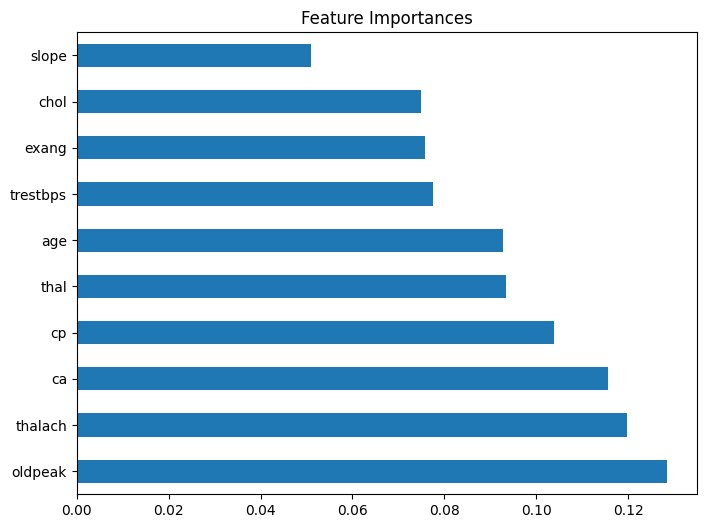

In [8]:
importances = rf.feature_importances_
feat_importances = pd.Series(importances, index=X.columns)
feat_importances.nlargest(10).plot(kind="barh", figsize=(8,6))
plt.title("Feature Importances")
plt.show()


In [9]:
dt_cv = DecisionTreeClassifier(max_depth=4, random_state=42)
rf_cv = RandomForestClassifier(n_estimators=100, random_state=42)

dt_scores = cross_val_score(dt_cv, X, y, cv=5)
rf_scores = cross_val_score(rf_cv, X, y, cv=5)

print("Decision Tree CV Accuracy:", dt_scores.mean())
print("Random Forest CV Accuracy:", rf_scores.mean())


Decision Tree CV Accuracy: 0.7652459016393444
Random Forest CV Accuracy: 0.8381967213114756
